#### Arzu ISIK TOPBAS

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


import statsmodels.api as sm
from statsmodels import tools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read in data
housing_df = pd.read_csv("Housing.csv")
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# convert yes to 1 and 'No' to 0
varaible_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes':1 , 'no':0})

housing_df[varaible_list] = housing_df[varaible_list].apply(binary_map)

In [4]:
furnish_df = pd.get_dummies(housing_df['furnishingstatus'], drop_first=True)
furnish_df.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [5]:
housing_df = pd.concat([housing_df,furnish_df], axis=1)   #Axis=1 is for horizontal stacking
housing_df =housing_df.drop(['furnishingstatus'], axis=1)
total_df=housing_df.dropna()
total_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [6]:
corr1 = total_df.corr(method='pearson')

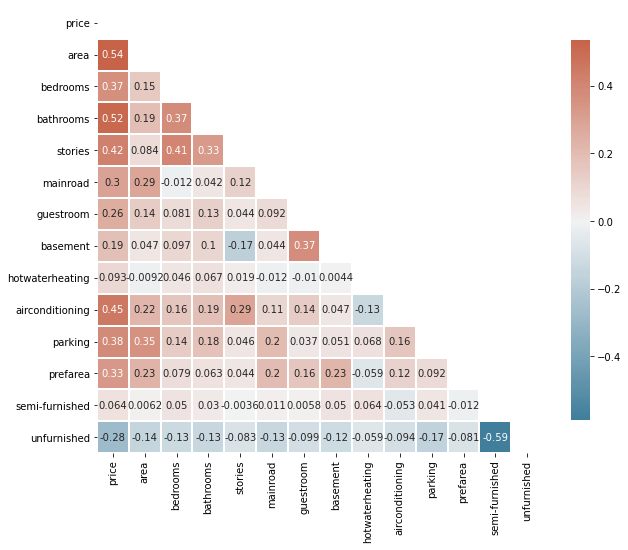

In [7]:
mask = np.triu(np.ones_like(corr1, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr1,mask=mask,cmap=cmap,square=True,annot = True,linewidth = 1,center = 0,cbar_kws={"shrink": 0.7});

In [8]:
# MinMax scaling
scaler = MinMaxScaler()
cols = total_df.columns
total_df[cols]= scaler.fit_transform(total_df[cols])

In [9]:
Y = total_df.pop('price')
X = total_df
X1 = sm.add_constant(X)
lr = sm.OLS(Y,X1)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 18 May 2021   Prob (F-statistic):          9.07e-123
Time:                        18:45:18   Log-Likelihood:                 531.39
No. Observations:                 545   AIC:                            -1035.
Df Residuals:                     531   BIC:                            -974.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0216      0.018      1.183      0.237      -0.014       0.057
area                0.3076      0.031     10.052      0.000       0.247       0.368
bedrooms            0.0497      0.031      1.581      0.114      -0.012       0.111
bathrooms           0.2565      0.027      9.555      0.000       0.204       0.309
stories             0.1171      0.017      7.026      0.000       0.084       0.150
mainroad            0.0365      0.012      2.962      0.003       0.012       0.061
guestroom           0.0260      0.011      2.282      0.023       0.004       0.048
basement            0.0303      0.010      3.175      0.002       0.012       0.049
hotwaterheating     0.0741      0.019      3.833      0.000       0.036       0.112
airconditioning     0.0749      0.009      7.983      0.000       0.056       0.093
parking             0.0720      0.015      4.735      0.000       0.042       0.102
prefarea            0.0564      0.010      5.632      0.000       0.037       0.076
semi-furnished     -0.0040      0.010     -0.398      0.691      -0.024       0.016
unfurnished        -0.0356      0.011     -3.258      0.001      -0.057      -0.014
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#Check the VIF - Multicollinearity
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif1 = vif.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
1,bedrooms,7.55
4,mainroad,5.91
0,area,4.64
3,stories,2.75
11,semi-furnished,2.24
6,basement,2.01
9,parking,2.00
12,unfurnished,1.87
8,airconditioning,1.76
2,bathrooms,1.69


In [11]:
# Remove 'bedrooms' due to high P-Value
X = X.drop('bedrooms',axis=1)
X2 = sm.add_constant(X)
lr_model2 = sm.OLS(endog = Y,exog =  X2).fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.34
Date:                Tue, 18 May 2021   Prob (F-statistic):          3.14e-123
Time:                        18:45:18   Log-Likelihood:                 530.11
No. Observations:                 545   AIC:                            -1034.
Df Residuals:                     532   BIC:                            -978.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0378      0.015      2.515      0.012       0.008       0.067
area                0.3114      0.031     10.194      0.000       0.251       0.371
bathrooms           0.2660      0.026     10.149      0.000       0.215       0.317
stories             0.1264      0.016      8.087      0.000       0.096       0.157
mainroad            0.0341      0.012      2.785      0.006       0.010       0.058
guestroom           0.0256      0.011      2.244      0.025       0.003       0.048
basement            0.0324      0.009      3.419      0.001       0.014       0.051
hotwaterheating     0.0746      0.019      3.857      0.000       0.037       0.113
airconditioning     0.0747      0.009      7.956      0.000       0.056       0.093
parking             0.0737      0.015      4.850      0.000       0.044       0.103
prefarea            0.0567      0.010      5.659      0.000       0.037       0.076
semi-furnished     -0.0038      0.010     -0.378      0.706      -0.024       0.016
unfurnished        -0.0362      0.011     -3.309      0.001      -0.058      -0.015
==============================================================================
Omnibus:                      102.415   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.248
Skew:                           0.925   Prob(JB):                     6.26e-61
Kurtosis:                       5.964   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#Check the VIF - Multicollinearity
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif2 = vif.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


/Users/arzuisiktopbas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


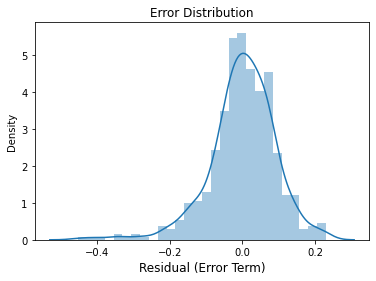

In [13]:
# Check Normality
y_pred = lr_model2.predict(X2)
residual = y_pred - Y
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 12})
plt.title('Error Distribution', fontdict={'fontsize': 12})
plt.show()

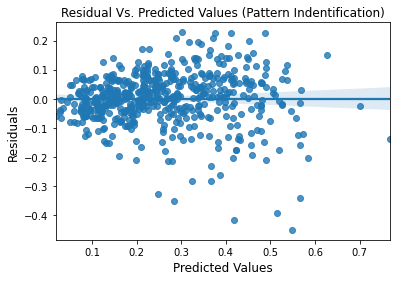

In [14]:
# Check Homoskedasticity
sns.regplot(x=y_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 12})
plt.xlabel('Predicted Values', fontdict={'fontsize': 12})
plt.ylabel('Residuals', fontdict={'fontsize': 12})
plt.show()

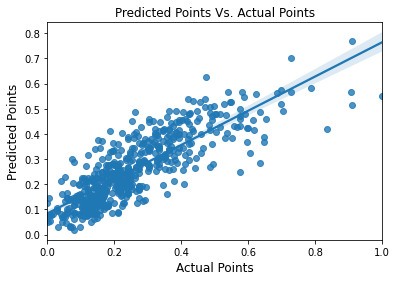

In [15]:
# Actual vs Predicted Points
sns.regplot(x=Y, y=y_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 12})
plt.xlabel('Actual Points', fontdict={'fontsize': 12})
plt.ylabel('Predicted Points', fontdict={'fontsize': 12})
plt.show()

In [16]:
# Robust Check
Y_robust = Y
X_robust = sm.add_constant(X2)
robust_model = sm.RLM(Y_robust, X_robust, M=sm.robust.norms.HuberT())
robust_result = robust_model.fit()
robust_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  price   No. Observations:                  545
Model:                            RLM   Df Residuals:                      532
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 18 May 2021                                         
Time:                        18:45:19                                         
No. Iterations:                    39                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0459      0.013      3.630      0.000       0.021       0.071
area                0.2885      0.026     11.225      0.000       0.238       0.339
bathrooms           0.2521      0.022     11.432      0.000       0.209       0.295
stories             0.1302      0.013      9.907      0.000       0.104       0.156
mainroad            0.0318      0.010      3.089      0.002       0.012       0.052
guestroom           0.0280      0.010      2.910      0.004       0.009       0.047
basement            0.0262      0.008      3.287      0.001       0.011       0.042
hotwaterheating     0.0675      0.016      4.148      0.000       0.036       0.099
airconditioning     0.0678      0.008      8.582      0.000       0.052       0.083
parking             0.0564      0.013      4.412      0.000       0.031       0.081
prefarea            0.0555      0.008      6.574      0.000       0.039       0.072
semi-furnished     -0.0020      0.009     -0.234      0.815      -0.019       0.015
unfurnished        -0.0350      0.009     -3.802      0.000      -0.053      -0.017
===================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [17]:
Y_partial = Y
X_partial = total_df[['area','bathrooms','stories']]
X1_partial = sm.add_constant(X_partial)
lr_partial = sm.OLS(Y_partial,X1_partial)
lr_result = lr_partial.fit()
lr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     204.1
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.60e-88
Time:                        18:45:19   Log-Likelihood:                 425.64
No. Observations:                 545   AIC:                            -843.3
Df Residuals:                     541   BIC:                            -826.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.010      7.344      0.000       0.053       0.091
area           0.4852      0.033     14.883      0.000       0.421       0.549
bathrooms      0.3310      0.031     10.819      0.000       0.271       0.391
stories        0.1521      0.017      8.714      0.000       0.118       0.186
==============================================================================
Omnibus:                      105.785   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.604
Skew:                           0.974   Prob(JB):                     1.05e-59
Kurtosis:                       5.858   Cond. No.                         7.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""